# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [37]:
# Import relevant packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [38]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
df = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [4]:
# Explore your DataFrame `aqi`.

df.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


In [6]:
df.shape

(260, 10)

In [7]:
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [8]:
df.tail()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9
259,259,2018-01-01,North Carolina,Wake,Not in a city,Triple Oak,Carbon monoxide,Parts per million,0.188889,2


In [9]:
# Convert 'date_local' to datetime if it's not already in datetime format
df['date_local'] = pd.to_datetime(df['date_local'])

# Sort by 'date_local' in ascending order
df_sorted = df.sort_values(by='date_local', ascending=True)

# Get the first and last dates
start_date = df_sorted['date_local'].iloc[0]
end_date = df_sorted['date_local'].iloc[-1]

print(f"The data covers the time range from {start_date} to {end_date}")

The data covers the time range from 2018-01-01 00:00:00 to 2018-01-01 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        260 non-null    int64         
 1   date_local        260 non-null    datetime64[ns]
 2   state_name        260 non-null    object        
 3   county_name       260 non-null    object        
 4   city_name         260 non-null    object        
 5   local_site_name   257 non-null    object        
 6   parameter_name    260 non-null    object        
 7   units_of_measure  260 non-null    object        
 8   arithmetic_mean   260 non-null    float64       
 9   aqi               260 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 20.4+ KB


**Question:** What time range does this data cover?

This data cover the time of 2018-01-01 of several district of US.


**Question:** What are the minimum and maximum AQI values observed in the dataset?

The minimum observed aqi value is 0 whereas, the maximum value is 50.

In [11]:
state_count = df['state_name'].value_counts()
print(state_count)

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

###### **Question:** Are all states equally represented in the dataset?
No, There are so many states some are represent once others upto 66 times.

###### <details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [39]:
# Summarize the mean AQI for RRE states.

### YOUR CODE HERE ###

# Create a list of RRE states.
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
rre_aqi = df[df['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
mean_aqi_by_state = rre_aqi[['state_name','aqi']].mean()
print(mean_aqi_by_state)

aqi    8.697479
dtype: float64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

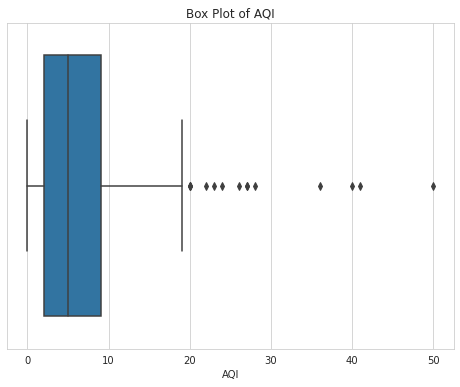

In [40]:
# Import seaborn as sns.

# Set the style of the plots (optional)
sns.set_style("whitegrid")

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['aqi'])

# Set the title and labels
plt.title('Box Plot of AQI')
plt.xlabel('AQI')

# Show the plot
plt.show()


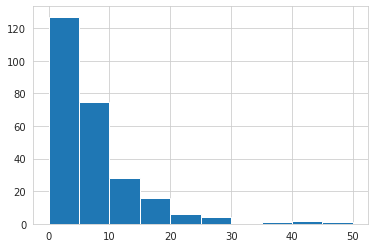

In [41]:
df['aqi'].hist()

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

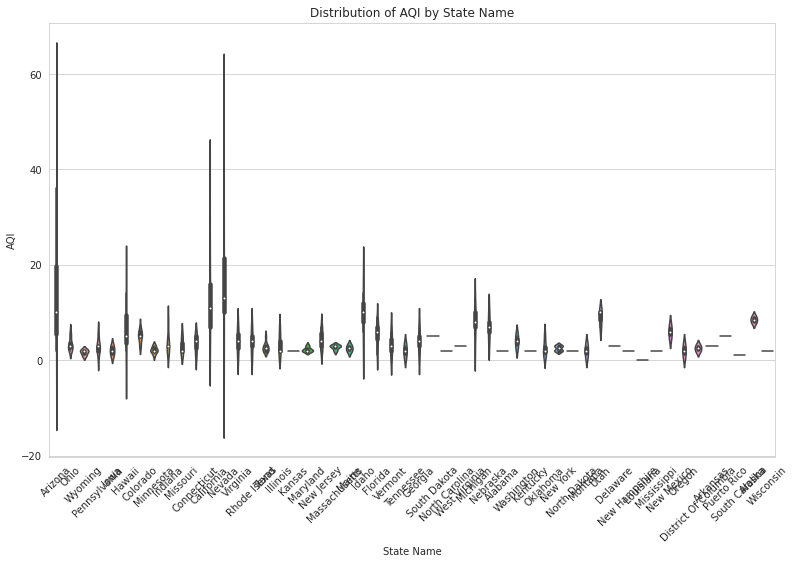

In [42]:
# Set the style of the plots (optional)
sns.set_style("whitegrid")

# Create a violin plot
plt.figure(figsize=(13, 8))
sns.violinplot(x='state_name', y='aqi', data=df)

# Set the title and labels
plt.title('Distribution of AQI by State Name')
plt.xlabel('State Name')
plt.ylabel('AQI')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

[Write your response here. Double-click (or enter) to edit.]

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

In [43]:
sampled_data = df.sample(n=50, replace=True, random_state=100)
sampled_data

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
79,79,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,Car-Barn Montgomery I -76,Carbon monoxide,Parts per million,0.223529,3
53,53,2018-01-01,South Dakota,Minnehaha,Sioux Falls,SD School for the Deaf,Carbon monoxide,Parts per million,0.242105,5
66,66,2018-01-01,Nebraska,Douglas,Omaha,4102 Woolworth Ave. on Healthcenter Warehouse,Carbon monoxide,Parts per million,0.227778,5
226,226,2018-01-01,Michigan,Kent,Grand Rapids,GR-MONROE,Carbon monoxide,Parts per million,0.200000,2
14,14,2018-01-01,Missouri,Jackson,Kansas City,"Blue Ridge, I-70",Carbon monoxide,Parts per million,0.233333,5
240,240,2018-01-01,Arizona,La Paz,Wenden,ALAMO LAKE,Carbon monoxide,Parts per million,0.200000,2
143,143,2018-01-01,Massachusetts,Worcester,Worcester,WORCESTER SUMMER STREET,Carbon monoxide,Parts per million,0.252632,3
228,228,2018-01-01,Georgia,Fulton,Atlanta,NR-GA Tech,Carbon monoxide,Parts per million,0.373684,6
58,58,2018-01-01,California,Kern,Arvin,Arvin-Di Giorgio,Carbon monoxide,Parts per million,0.278947,3


### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [44]:
# Find the mean aqi for your state.

sample_mean = sampled_data['aqi'].mean()
sample_mean

7.24

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [45]:
estimated_std_error = sampled_data['aqi'].std() / np.sqrt(sampled_data.shape[0])
estimated_std_error

1.0949084390011423

In [47]:
# Input your confidence level here:

stats.norm.interval(alpha=0.95, loc=sample_mean, scale=estimated_std_error)

(5.094018893188791, 9.38598110681121)

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [48]:
# Calculate your margin of error.

### YOUR CODE HERE ###

# Begin by identifying the z associated with your chosen confidence level.

# Next, calculate your standard error.

# Lastly, use the preceding result to calculate your margin of error.
# Given values
alpha = 0.95  # Confidence level
z = stats.norm.ppf(1 - (1 - alpha) / 2)  # z-score for a 95% confidence level

# Given values from your code
sample_mean = (5.094018893188791 + 9.38598110681121) / 2  # Mean of the confidence interval
estimated_std_error = (9.38598110681121 - sample_mean) / z  # Estimated standard error

# Calculate the margin of error
margin_of_error = z * estimated_std_error

# Print the margin of error
print("Margin of Error:", margin_of_error)

Margin of Error: 2.1459811068112096


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [49]:
# Calculate your confidence interval (upper and lower limits).

# Calculate the confidence interval
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

# Print the confidence interval
print("Confidence Interval (Lower Limit):", lower_limit)
print("Confidence Interval (Upper Limit):", upper_limit)

Confidence Interval (Lower Limit): 5.094018893188791
Confidence Interval (Upper Limit): 9.38598110681121


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [50]:
# Import stats from scipy.

stats.norm.interval(alpha=0.95, loc=sample_mean, scale=estimated_std_error)

(5.094018893188791, 9.38598110681121)

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [51]:
stats.norm.interval(alpha=0.99, loc=sample_mean, scale=estimated_std_error)

(4.419702758117874, 10.060297241882125)

# Considerations

**What are some key takeaways that you learned from this lab?**
 I learned how to calculate the confidence interval of the dataset to be shared with stakeholders.
 
**What findings would you share with others?**

The CI of the aqi which help to make decision which district to be focused for higher aqi level with confidence level.

**What would you convey to external stakeholders?**

Both the CI levels.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.